In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics

#**a)Visualize using pairplot and log,exp transform**

In [35]:
url='https://www.ee.iitb.ac.in/~asethi/Dump/DataClustering.csv'
df = pd.read_csv(url)
display(df)


,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825
...,...,...,...,...
346,0.203877,0.195724,2.766999,1.826532
347,0.229380,0.131514,0.704255,2.762919
348,0.095878,0.107426,0.946789,3.434620
349,0.111690,0.130970,1.098922,2.295701


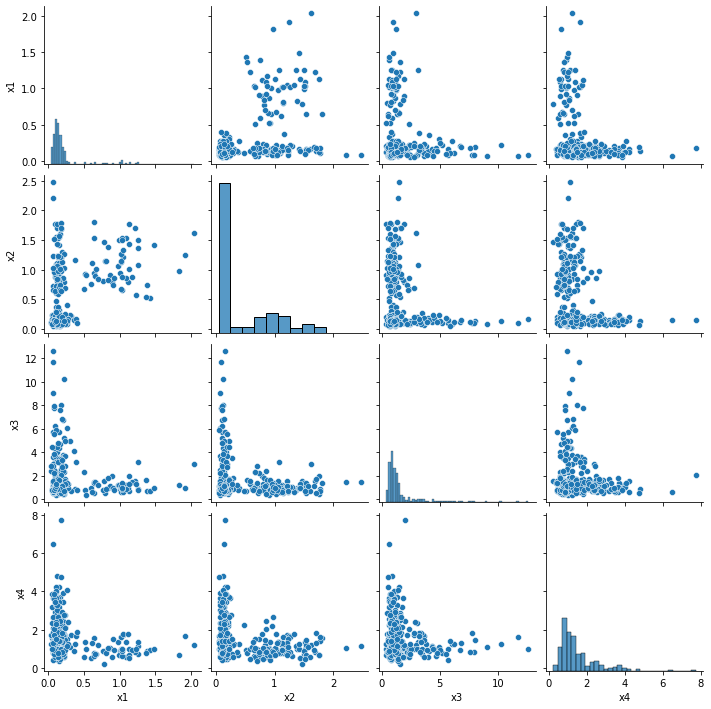

In [36]:
df1=df
sns.pairplot(df1)


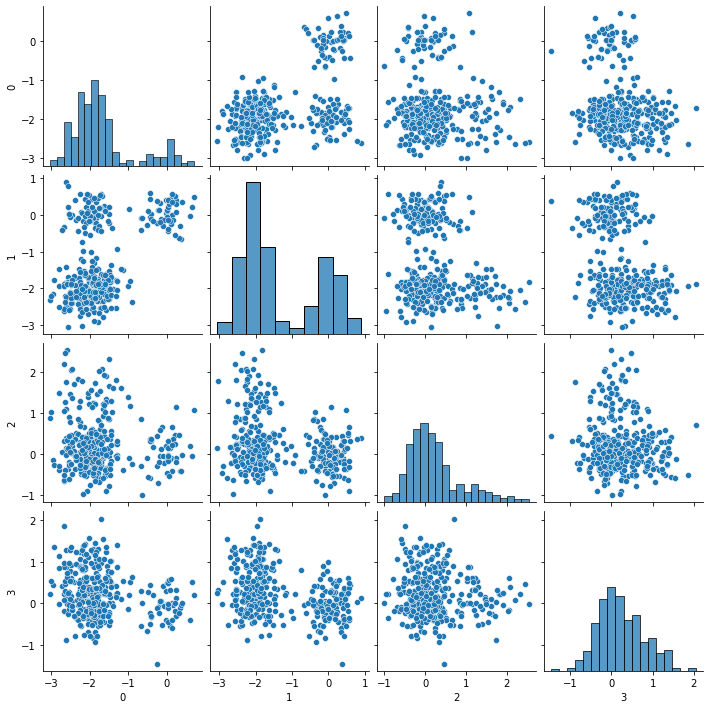

In [37]:
df1=pd.DataFrame(np.log(np.array(df)))
sns.pairplot(df1)




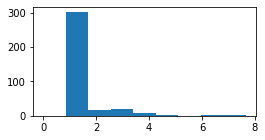

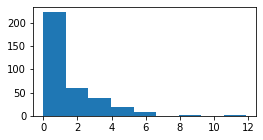

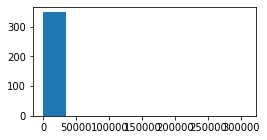

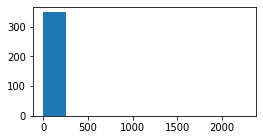

In [38]:
df1=pd.DataFrame(np.exp(np.array(df)))
for i in [0,1,2,3]:
  a =np.array(df1[df1.columns[i]])
  fig, ax = plt.subplots(figsize =(4, 2))
  ax.hist(a, bins = np.linspace(0,np.max(a),10))
  plt.show()

#**b)Silhoutte based K-means clustering**

In [39]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [40]:
df=pd.DataFrame(np.log(np.array(df)))

df=np.asarray(df)
Sum_of_squared_distances = []
score=[]
K = range(2,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
    y = km.labels_
    score.append(metrics.silhouette_score(df, y, metric='euclidean'))

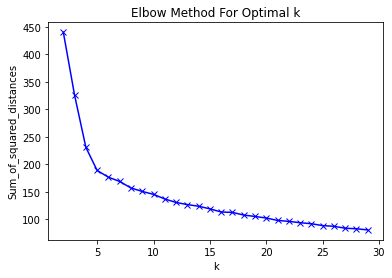

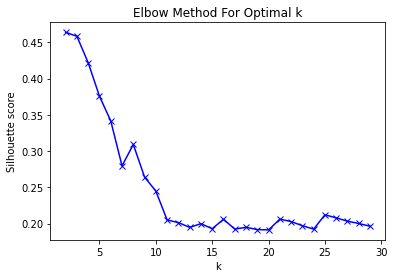

In [41]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

plt.plot(K,score, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Elbow Method For Optimal k')
plt.show()

#**c)T-sne embedding visualization**

https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


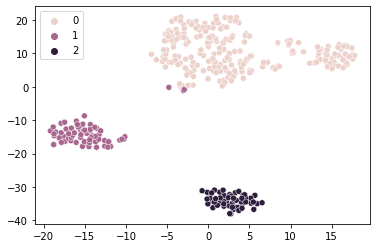

In [50]:
import numpy as np
from sklearn.manifold import TSNE

km = KMeans(n_clusters=3)
km = km.fit(df)
y = km.labels_

df_2D = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(df)
sns.scatterplot(df_2D[:,0],df_2D[:,1], hue=y, legend='full')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


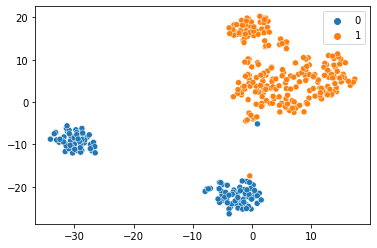

In [51]:
km = KMeans(n_clusters=2)
km = km.fit(df)
y = km.labels_

df_2D = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(df)
sns.scatterplot(df_2D[:,0],df_2D[:,1], hue=y, legend='full')

#**Comments and Insights**

1)Log transform gives neat clusters.

2)Silhouette score is maximum for cluster=2 and cluster=3.Cluster=3 gives us a good clustering visual in tsne.
